In [1]:
!pip install dask-ml
from dask_ml import *

     |████████████████████████████████| 148 kB 5.3 MB/s            


In [2]:
!pip install hummingbird_ml
!pip install hummingbird_ml[extra]
!pip install dask
!pip install dask-cudf
!pip install dask_cuda

     |████████████████████████████████| 181 kB 4.5 MB/s            
     |████████████████████████████████| 83 kB 2.1 MB/s             
     |████████████████████████████████| 14.6 MB 46.7 MB/s            
     |████████████████████████████████| 304 kB 60.2 MB/s            
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.4
    Uninstalling protobuf-3.19.4:
      Successfully uninstalled protobuf-3.19.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
beatrix-jupyterlab 3.1.6 requires google-cloud-bigquery-storage, which is not installed.
tfx-bsl 1.5.0 requires absl-py<0.13,>=0.9, but you have absl-py 0.15.0 which is incompatible.
tfx-bsl 1.5.0 requires numpy<1.20,>=

In [3]:
import sklearn
from sklearn.model_selection import GridSearchCV
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score, pairwise_distances, silhouette_samples, silhouette_score, confusion_matrix, roc_curve, auc
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from time import time
from datetime import datetime
import matplotlib.cm as cm
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer
from datetime import datetime
from joblib import Parallel, delayed

import seaborn as sns
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from hummingbird.ml import convert, load
import joblib

#Import libraries:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from dask.distributed import Client
# It's recommended to use dask_cuda for GPU assignment
from dask_cuda import LocalCUDACluster
from dask import array as da

%matplotlib inline

In [4]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score, pairwise_distances, silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering 
from sklearn.manifold import TSNE

# classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

from statsmodels.stats.outliers_influence import variance_inflation_factor
from time import time
from datetime import datetime
import matplotlib.cm as cm
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer
from datetime import datetime
from joblib import Parallel, delayed

import seaborn as sns
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [5]:
X = pd.read_csv("../input/logstdvif/x_vif_only.csv")
X.drop(['Unnamed: 0','rev_stop'], axis=1, inplace=True)
y = pd.read_csv("../input/logstdvif/y.csv")['went_on_backorder']

In [6]:
X.shape

(1775318, 14)

In [7]:
### from sklearn import * 
from collections import Counter
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2,random_state=0)   
# Check the number of records
print('The number of records in the training dataset is', x_train.shape[0])
print('The number of records in the test dataset is', x_test.shape[0])

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
from imblearn.over_sampling import SMOTENC

oversample = SMOTENC(sampling_strategy={1: int(1410291/3)},categorical_features=[9,10,11,12,13], random_state = 2)
x_train_res, y_train_res = oversample.fit_resample(x_train, y_train)
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

The number of records in the training dataset is 1420254
The number of records in the test dataset is 355064
Before OverSampling, counts of label '1': 9963
Before OverSampling, counts of label '0': 1410291 

After OverSampling, the shape of train_X: (1880388, 14)
After OverSampling, the shape of train_y: (1880388,) 

After OverSampling, counts of label '1': 470097
After OverSampling, counts of label '0': 1410291


The number of records in the training dataset is 1420254\
The number of records in the test dataset is 355064\
Before OverSampling, counts of label '1': 9963\
Before OverSampling, counts of label '0': 1410291 

After OverSampling, the shape of train_X: (1880388, 14)\
After OverSampling, the shape of train_y: (1880388,) 

After OverSampling, counts of label '1': 470097\
After OverSampling, counts of label '0': 1410291

In [8]:
pd.DataFrame(x_train_res).to_csv('x_train_res.csv')
pd.DataFrame(y_train_res).to_csv('y_train_res.csv')
pd.DataFrame(x_test).to_csv('x_test.csv')
pd.DataFrame(y_test).to_csv('y_test.csv')

In [9]:
x_train_res=pd.read_csv('../input/smotencscmodelling/x_train_res.csv')
y_train_res=pd.read_csv('../input/smotencscmodelling/y_train_res.csv')
x_test=pd.read_csv('../input/smotencscmodelling/x_test.csv')
y_test=pd.read_csv('../input/smotencscmodelling/y_test.csv')
# dropping the Unnamed: 0 column
x_train_res = x_train_res.drop(['Unnamed: 0'],axis=1)
y_train_res = y_train_res.drop(['Unnamed: 0'],axis=1)['went_on_backorder']
x_test = x_test.drop(['Unnamed: 0'],axis=1)
y_test = y_test.drop(['Unnamed: 0'],axis=1)['went_on_backorder']

# Adacost

In [10]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier


class AdaCostClassifier(AdaBoostClassifier): 
    def __init__(self, base_estimator=None, n_estimators=150, learning_rate=0.5, 
                 FNcost='auto', FPcost=1, algorithm='SAMME.R', random_state=None):
        super(AdaBoostClassifier, self).__init__(
            base_estimator=base_estimator,n_estimators=n_estimators,
            learning_rate=learning_rate, random_state=random_state)
        self.FPcost = FPcost
        self.FNcost = FNcost
        self.algorithm = algorithm
    
    def _boost_real(self, iboost, X, y, sample_weight, random_state):
        """Implement a single boost using the SAMME.R real algorithm."""
        estimator = self._make_estimator(random_state=random_state)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict_proba = estimator.predict_proba(X)

        if iboost == 0:
            self.classes_ = getattr(estimator, 'classes_', None)
            self.n_classes_ = len(self.classes_)
        y_predict = self.classes_.take(np.argmax(y_predict_proba, axis=1), axis=0)
        incorrect = y_predict != y
        estimator_error = np.mean(np.average(incorrect, weights=sample_weight, axis=0))
        if estimator_error <= 0:
            return sample_weight, 1., 0.

        n_classes = self.n_classes_
        classes = self.classes_
        y_codes = np.array([-1. / (n_classes - 1), 1.])
        y_coding = y_codes.take(classes == y[:, np.newaxis])
        proba = y_predict_proba  # alias for readability
        

        np.clip(proba, np.finfo(proba.dtype).eps, None, out=proba)
        
        estimator_weight = (-1. * self.learning_rate * ((n_classes - 1.) / n_classes)
                            * (y_coding * np.log(y_predict_proba)).sum(axis=1))
        
        if not iboost == self.n_estimators - 1:
            criteria = ((sample_weight > 0) | (estimator_weight < 0))
            sample_weight *= np.exp(estimator_weight * criteria * self._beta(y, y_predict))  
        return sample_weight, 1., estimator_error

    def _beta(self, y, y_hat):
        res = []
        ratio = sum(y==0) / sum(y==1)
        if self.FNcost == 'auto':
            self.FNcost = ratio
        
        for i in zip(y, y_hat):
            if  i[0] == 1 and i[1] == 0:
                res.append(self.FNcost)  
            elif i[0] == 0 and i[1] == 1:
                res.append(self.FPcost)    
            else:
                res.append(1)
        return np.array(res)

In [11]:
ratio = sum(y_train_res==0)/sum(y_train_res==1)

In [12]:
ratio

3.0

In [13]:
def modelfit(x_train, y_train, x_test, y_test, params, early_stopping_rounds=1000):    
    alg = AdaCostClassifier(learning_rate = 1, random_state=100)
    #cv = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True)
    grid_ada = sklearn.model_selection.GridSearchCV(estimator = alg, param_grid = params, cv=3, verbose=3, scoring='roc_auc', n_jobs = 1)
    
    #Fit the algorithm on the data
    grid_ada.fit(x_train, y_train)
    grid_ada = grid_ada
    grid_result = grid_ada.best_estimator_
    
    #train_history = grid_result.evals_result()
    y_pred_test = grid_result.predict(x_test)
    y_predprob_test = grid_result.predict_proba(x_test)[:,-1]
   
    #return grid_result, y_pred_train, y_predprob_train, y_pred_test, y_predprob_test, train_history
    return grid_ada, grid_result, y_pred_test, y_predprob_test
    
    print("Best Iteration: {}".format(grid_result.get_booster().best_iteration))
    
    feat_imp = pd.Series(grid_result.get_booster().get_score()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [14]:
#params={'FNcost':np.linspace(1.1, ratio, 3), 'FPcost':np.linspace(0.5, 1, 3)} #0.5

In [15]:
params={'learning_rate':[0.01,0.03,0.02,1],
        'FNcost':[1.5], 'FPcost':[1]} # [1.5, 2, 3]

In [16]:
cluster = LocalCUDACluster()
client = Client(cluster)
from joblib import parallel_backend

#client = Client(processes=False)   # create local cluster
#with joblib.parallel_backend('dask'):
with LocalCUDACluster() as cluster:
    with Client(cluster) as client:
        grid_ada, grid_result_ada, y_pred_test_ada, y_predprob_test_ada = modelfit(x_train_res, y_train_res, x_test, y_test, params)

distributed.preloading - INFO - Import preload module: dask_cuda.initialize
distributed.preloading - INFO - Import preload module: dask_cuda.initialize
distributed.worker - WARNING - Mismatched versions found

+-------------+-------------+-----------+-----------+
| Package     | This Worker | scheduler | workers   |
+-------------+-------------+-----------+-----------+
| dask        | 2022.01.0   | 2022.02.0 | 2022.01.0 |
| distributed | 2022.01.0   | 2022.02.0 | 2022.01.0 |
+-------------+-------------+-----------+-----------+
distributed.worker - WARNING - Mismatched versions found

+-------------+-------------+-----------+-----------+
| Package     | This Worker | scheduler | workers   |
+-------------+-------------+-----------+-----------+
| dask        | 2022.01.0   | 2022.02.0 | 2022.01.0 |
| distributed | 2022.01.0   | 2022.02.0 | 2022.01.0 |
+-------------+-------------+-----------+-----------+
distributed.preloading - INFO - Import preload module: dask_cuda.initialize
distribu

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END FNcost=1.5, FPcost=1, learning_rate=0.01;, score=0.888 total time=27.3min
[CV 2/3] END FNcost=1.5, FPcost=1, learning_rate=0.01;, score=0.888 total time=27.4min
[CV 3/3] END FNcost=1.5, FPcost=1, learning_rate=0.01;, score=0.889 total time=27.3min
[CV 1/3] END FNcost=1.5, FPcost=1, learning_rate=0.03;, score=0.913 total time=27.5min
[CV 2/3] END FNcost=1.5, FPcost=1, learning_rate=0.03;, score=0.913 total time=27.6min
[CV 3/3] END FNcost=1.5, FPcost=1, learning_rate=0.03;, score=0.913 total time=27.7min
[CV 1/3] END FNcost=1.5, FPcost=1, learning_rate=0.02;, score=0.904 total time=27.6min
[CV 2/3] END FNcost=1.5, FPcost=1, learning_rate=0.02;, score=0.905 total time=27.7min
[CV 3/3] END FNcost=1.5, FPcost=1, learning_rate=0.02;, score=0.904 total time=27.5min
[CV 1/3] END FNcost=1.5, FPcost=1, learning_rate=1;, score=0.951 total time=27.4min
[CV 2/3] END FNcost=1.5, FPcost=1, learning_rate=1;, score=0.952 total ti

In [17]:
auc1 = roc_auc_score(y_test, y_predprob_test_ada)
f1_score1 = f1_score(y_test, y_pred_test_ada)
recall = recall_score(y_test, y_pred_test_ada)
acc = accuracy_score(y_test, y_pred_test_ada)
con_matrix = confusion_matrix(y_test, y_pred_test_ada)
print('AUC:{:.6f}, F1_score:{:.6f}, Recall:{:.6f}, Acc:{:.6f}'.format(auc1, f1_score1, recall, acc))
con_matrix

AUC:0.924818, F1_score:0.060612, Recall:0.899249, Acc:0.801306


array([[282239,  70294],
       [   255,   2276]])

In [18]:
print(sklearn.metrics.classification_report(y_test, y_pred_test_ada))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89    352533
           1       0.03      0.90      0.06      2531

    accuracy                           0.80    355064
   macro avg       0.52      0.85      0.47    355064
weighted avg       0.99      0.80      0.88    355064



In [19]:
grid_ada.best_params_, grid_ada.best_score_

({'FNcost': 1.5, 'FPcost': 1, 'learning_rate': 1}, 0.9515485636683761)

In [20]:
pd.DataFrame(grid_ada.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_FNcost,param_FPcost,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1627.598168,2.732859,11.034986,0.284313,1.5,1,0.01,"{'FNcost': 1.5, 'FPcost': 1, 'learning_rate': ...",0.887640,0.888382,0.888521,0.888181,0.000387,4
1,1645.195165,6.258224,10.877526,0.243904,1.5,1,0.03,"{'FNcost': 1.5, 'FPcost': 1, 'learning_rate': ...",0.912855,0.912879,0.913091,0.912942,0.000106,2
2,1645.917800,5.946983,10.795957,0.227408,1.5,1,0.02,"{'FNcost': 1.5, 'FPcost': 1, 'learning_rate': ...",0.904436,0.904666,0.903859,0.904320,0.000339,3
3,1640.958411,3.506884,10.640116,0.029392,1.5,1,1,"{'FNcost': 1.5, 'FPcost': 1, 'learning_rate': 1}",0.950957,0.951654,0.952035,0.951549,0.000446,1


In [21]:
#https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred_test_ada))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.80      0.90      0.89      0.85      0.71    352533
          1       0.03      0.90      0.80      0.06      0.85      0.73      2531

avg / total       0.99      0.80      0.90      0.88      0.85      0.71    355064



[[282239  70294]
 [   255   2276]]
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.80      0.90      0.89      0.85      0.71    352533
          1       0.03      0.90      0.80      0.06      0.85      0.73      2531

avg / total       0.99      0.80      0.90      0.88      0.85      0.71    355064



Text(0.5, 1.0, 'OverSampling Precision-Recall curve:\nAverage Precision-Recall Score =0.14')

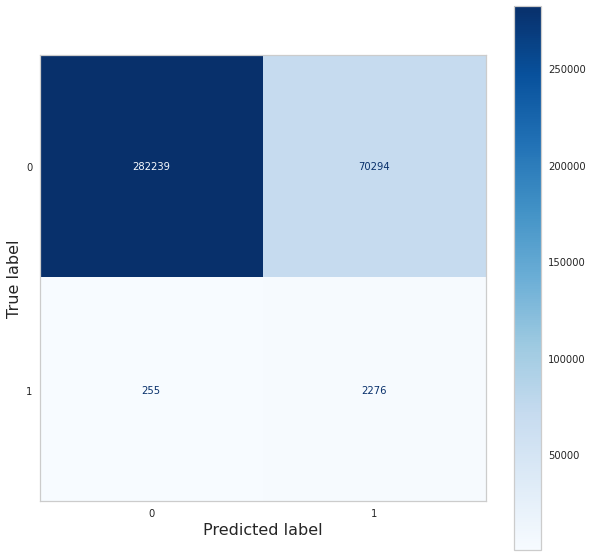

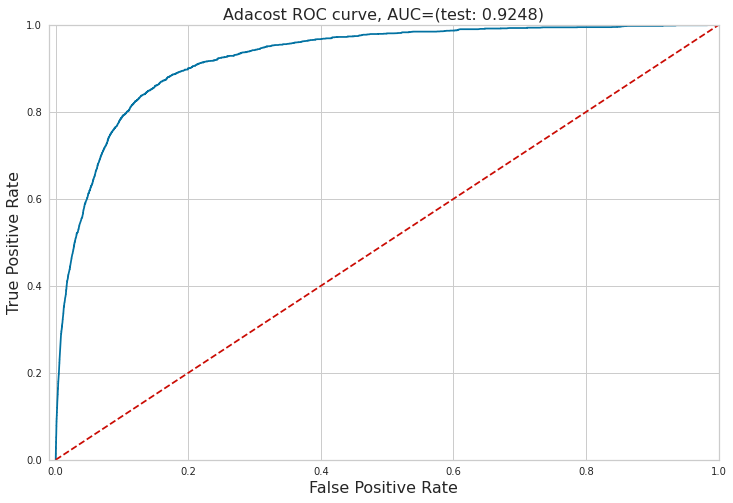

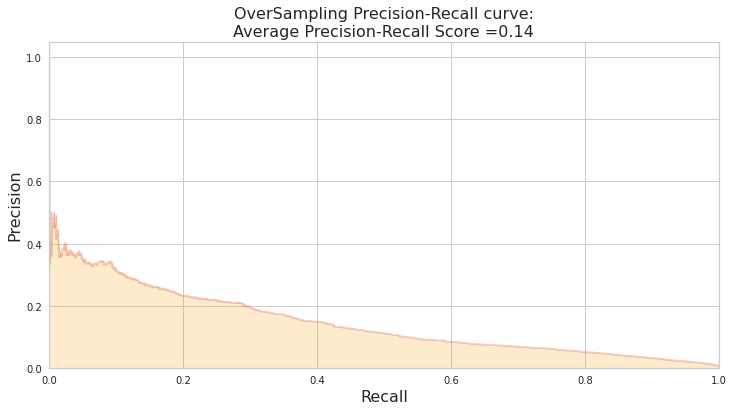

In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_test_ada))

confusionMatrix = confusion_matrix(y_test,y_pred_test_ada,labels=[0,1])
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix,display_labels=[0,1])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
cm_display.plot(ax=ax,cmap="Blues", values_format='')
plt.savefig('ada_confusion_matrix.png')

fpr_test, tpr_test, _ = sklearn.metrics.roc_curve(y_test, y_predprob_test_ada)
auc_test = sklearn.metrics.auc(fpr_test, tpr_test)
plt.figure(figsize=(12,8))
plt.title(f"Adacost ROC curve, AUC=(test: {auc_test:.4f})", fontsize=16)
plt.plot(fpr_test, tpr_test, label="test data")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.axis([-0.01,1,0,1])
plt.savefig("ada_roc_auc.png")

from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred_test_ada))

fig = plt.figure(figsize=(12,6))
precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test, y_predprob_test_ada)
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve:\nAverage Precision-Recall Score ={0:0.2f}'.format(
          sklearn.metrics.average_precision_score(y_test, y_predprob_test_ada)), fontsize=16)

# CatBOOST

In [23]:
from sklearn.model_selection import RepeatedStratifiedKFold
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

def modelfit(x_train, y_train, x_test, y_test, params, client, early_stopping_rounds=100):    
    #evals_result = {}
    #eval_s = [(x_train, y_train), (x_test, y_test)]
    alg = CatBoostClassifier()
    #cv = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True)
    grid_cat = sklearn.model_selection.GridSearchCV(estimator = alg, param_grid = params, cv=3, verbose=2, scoring='roc_auc')
    
    #Fit the algorithm on the data
    #grid_xgb.fit(x_train, y_train, eval_set=eval_s, early_stopping_rounds=100)
    grid_cat.fit(x_train, y_train)
    grid_cat = grid_cat
    grid_result = grid_cat.best_estimator_
    
    #train_history = grid_result.evals_result()
    y_pred_test = grid_result.predict(x_test)
    y_predprob_test = grid_result.predict_proba(x_test)[:,1]
    
    #return grid_result, y_pred_train, y_predprob_train, y_pred_test, y_predprob_test, train_history
    return grid_cat, grid_result, y_pred_test, y_predprob_test    

In [24]:
params={'learning_rate': [0.5], 'early_stopping_rounds': [500],
             'task_type': ['GPU'], 'devices':['0:1'], 'boost_from_average': [False],
             'leaf_estimation_backtracking': ['AnyImprovement'],
              'grow_policy': ['Lossguide'], 
             'feature_border_type': ['GreedyLogSum'], 'border_count': [254], 
             'max_leaves': [100], 'score_function': ['Cosine'],
             'boosting_type':['Plain'],
             'sparse_features_conflict_fraction': [0], 'rsm': [1], 
             'posterior_sampling': [False], 'random_seed': [786], 
             'depth': [20], #4,6,20
             'random_strength': [1], 
             'loss_function': ['Logloss'], 'model_size_reg': [0.5],
             'eval_metric':['AUC'],
             'scale_pos_weight':[3]}#[3,1.5,2,1]
       

In [25]:
cluster = LocalCUDACluster()
client = Client(cluster)
from joblib import parallel_backend

#client = Client(processes=False)   # create local cluster
#with joblib.parallel_backend('dask'):
with LocalCUDACluster() as cluster:
    with Client(cluster) as client:
        grid_cat, grid_result_cat, y_pred_test_cat, y_predprob_test_cat = modelfit(x_train_res, y_train_res, x_test, y_test, params, client)

distributed.preloading - INFO - Import preload module: dask_cuda.initialize
distributed.preloading - INFO - Import preload module: dask_cuda.initialize
distributed.worker - WARNING - Mismatched versions found

+-------------+-------------+-----------+-----------+
| Package     | This Worker | scheduler | workers   |
+-------------+-------------+-----------+-----------+
| dask        | 2022.01.0   | 2022.02.0 | 2022.01.0 |
| distributed | 2022.01.0   | 2022.02.0 | 2022.01.0 |
+-------------+-------------+-----------+-----------+
distributed.worker - WARNING - Mismatched versions found

+-------------+-------------+-----------+-----------+
| Package     | This Worker | scheduler | workers   |
+-------------+-------------+-----------+-----------+
| dask        | 2022.01.0   | 2022.02.0 | 2022.01.0 |
| distributed | 2022.01.0   | 2022.02.0 | 2022.01.0 |
+-------------+-------------+-----------+-----------+
distributed.preloading - INFO - Import preload module: dask_cuda.initialize
distribu

Fitting 3 folds for each of 1 candidates, totalling 3 fits
0:	learn: 0.9230753	total: 407ms	remaining: 6m 46s
1:	learn: 0.9458914	total: 764ms	remaining: 6m 21s
2:	learn: 0.9585513	total: 1.13s	remaining: 6m 14s
3:	learn: 0.9638191	total: 1.51s	remaining: 6m 16s
4:	learn: 0.9734903	total: 1.9s	remaining: 6m 17s
5:	learn: 0.9777146	total: 2.27s	remaining: 6m 15s
6:	learn: 0.9812931	total: 2.64s	remaining: 6m 14s
7:	learn: 0.9843976	total: 3.16s	remaining: 6m 31s
8:	learn: 0.9866603	total: 3.54s	remaining: 6m 29s
9:	learn: 0.9882126	total: 3.9s	remaining: 6m 26s
10:	learn: 0.9900938	total: 4.49s	remaining: 6m 43s
11:	learn: 0.9915243	total: 5.07s	remaining: 6m 57s
12:	learn: 0.9933156	total: 5.79s	remaining: 7m 19s
13:	learn: 0.9941354	total: 6.16s	remaining: 7m 14s
14:	learn: 0.9948519	total: 6.55s	remaining: 7m 10s
15:	learn: 0.9952382	total: 6.92s	remaining: 7m 5s
16:	learn: 0.9960348	total: 7.27s	remaining: 7m
17:	learn: 0.9963712	total: 7.65s	remaining: 6m 57s
18:	learn: 0.9965951	t

[[350104   2429]
 [  1522   1009]]
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.40      0.99      0.63      0.42    352533
          1       0.29      0.40      0.99      0.34      0.63      0.37      2531

avg / total       0.99      0.99      0.40      0.99      0.63      0.42    355064



Text(0.5, 1.0, 'OverSampling Precision-Recall curve:\nAverage Precision-Recall Score =0.29')

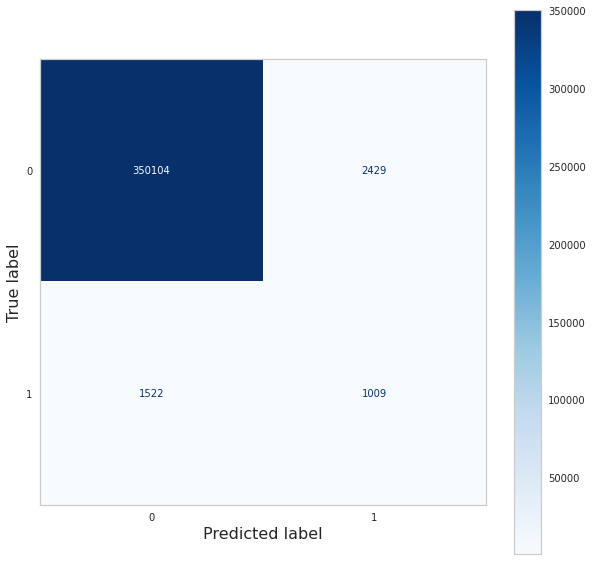

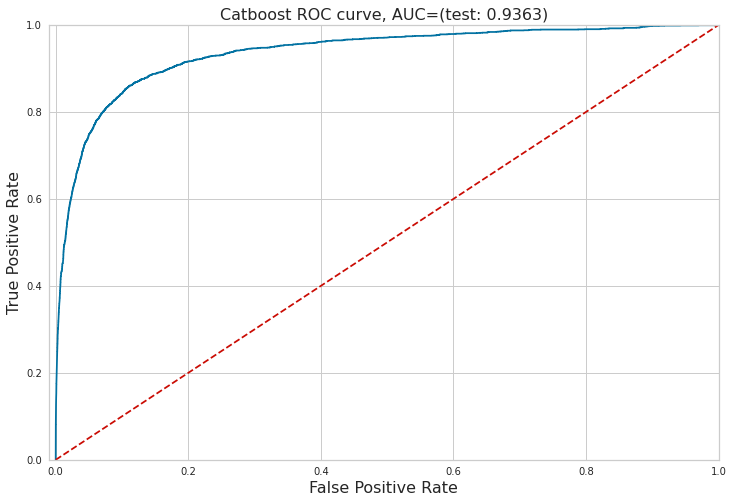

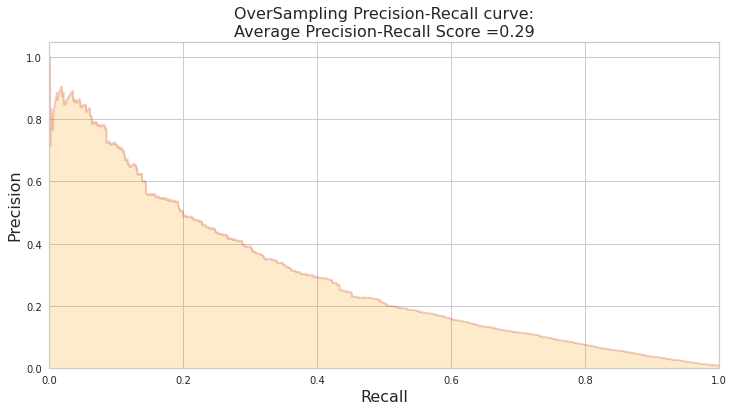

In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_test_cat))

confusionMatrix = confusion_matrix(y_test,y_pred_test_cat,labels=[0,1])
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix,display_labels=[0,1])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
cm_display.plot(ax=ax,cmap="Blues", values_format='')
plt.savefig('cat_confusion_matrix.png')

fpr_test, tpr_test, _ = sklearn.metrics.roc_curve(y_test, y_predprob_test_cat)
auc_test = sklearn.metrics.auc(fpr_test, tpr_test)
plt.figure(figsize=(12,8))
plt.title(f"Catboost ROC curve, AUC=(test: {auc_test:.4f})", fontsize=16)
plt.plot(fpr_test, tpr_test, label="test data")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.axis([-0.01,1,0,1])
plt.savefig("cat_roc_auc.png")

from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred_test_cat))

fig = plt.figure(figsize=(12,6))
precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test, y_predprob_test_cat)
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve:\nAverage Precision-Recall Score ={0:0.2f}'.format(
          sklearn.metrics.average_precision_score(y_test, y_predprob_test_cat)), fontsize=16)

In [27]:
sklearn.metrics.roc_auc_score(y_test, y_predprob_test_cat)

0.9363468810852673

In [28]:
pd.DataFrame(grid_cat.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_boost_from_average,param_boosting_type,param_border_count,param_depth,param_devices,param_early_stopping_rounds,...,param_score_function,param_sparse_features_conflict_fraction,param_task_type,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,484.915446,35.486784,14.719783,0.614451,False,Plain,254,20,0:1,500,...,Cosine,0,GPU,"{'boost_from_average': False, 'boosting_type':...",0.995723,0.999872,0.999873,0.998489,0.001956,1


In [29]:
grid_cat.best_params_, grid_cat.best_score_

({'boost_from_average': False,
  'boosting_type': 'Plain',
  'border_count': 254,
  'depth': 20,
  'devices': '0:1',
  'early_stopping_rounds': 500,
  'eval_metric': 'AUC',
  'feature_border_type': 'GreedyLogSum',
  'grow_policy': 'Lossguide',
  'leaf_estimation_backtracking': 'AnyImprovement',
  'learning_rate': 0.5,
  'loss_function': 'Logloss',
  'max_leaves': 100,
  'model_size_reg': 0.5,
  'posterior_sampling': False,
  'random_seed': 786,
  'random_strength': 1,
  'rsm': 1,
  'scale_pos_weight': 3,
  'score_function': 'Cosine',
  'sparse_features_conflict_fraction': 0,
  'task_type': 'GPU'},
 0.9984890309116259)

In [30]:
x_train_res.dtypes

perf_12_month_avg    float64
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
sales_9_month        float64
min_bank             float64
pieces_past_due      float64
local_bo_qty         float64
potential_issue        int64
deck_risk              int64
oe_constraint          int64
ppap_risk              int64
stop_auto_buy          int64
dtype: object

In [31]:
import numpy as np
import catboost
from catboost import CatBoost, Pool

is_cat = (x_train_res.dtypes != float) & (x_train_res.dtypes != int)
for feature, feat_is_cat in is_cat.to_dict().items():
    if feat_is_cat:
        x_train_res[feature].fillna("NAN", inplace=True)
        
cat_features_index = np.where(is_cat)[0]
pool = Pool(x_train_res, y_train_res, cat_features=cat_features_index, feature_names=list(x_train_res.columns))

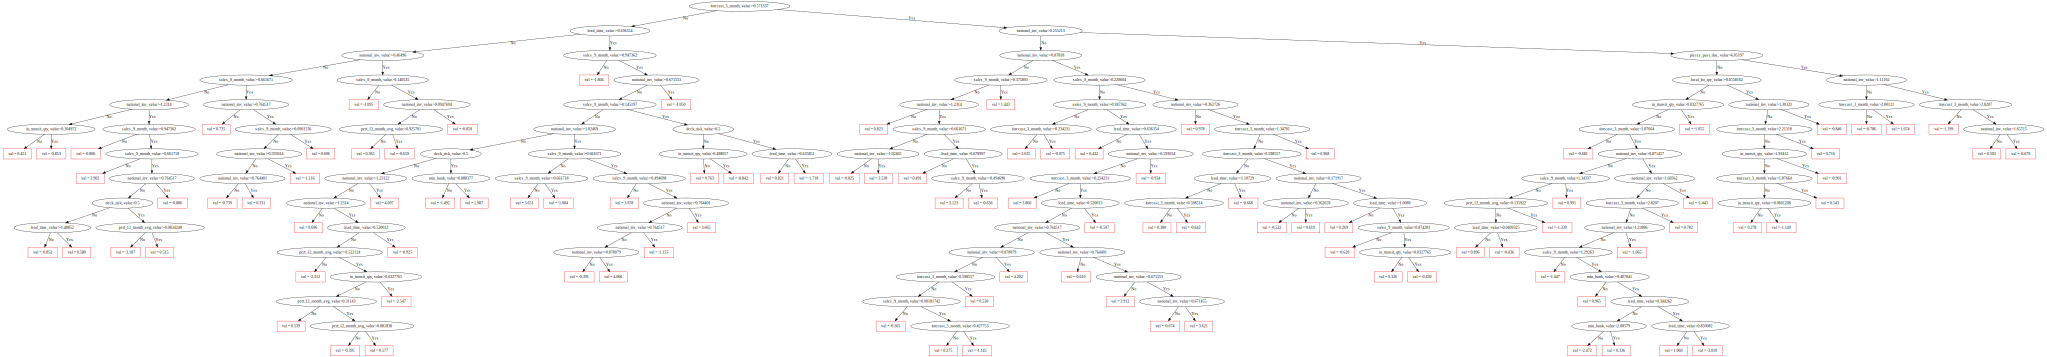

<Figure size 2160x1080 with 0 Axes>

In [32]:

fig = plt.gcf()
fig.set_size_inches(30, 15)
grid_result_cat.plot_tree(
    tree_idx=0,
    pool=pool
)


# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

def modelfit(x_train, y_train, x_test, y_test, params, early_stopping_rounds=100):    
    alg = RandomForestClassifier(random_state=100)
    #cv = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True)
    grid_rf = sklearn.model_selection.GridSearchCV(estimator = alg, param_grid = params, cv=3, verbose=3, scoring='roc_auc', n_jobs = 1)
    
    #Fit the algorithm on the data
    grid_rf.fit(x_train, y_train)
    grid_rf = grid_rf
    grid_result = grid_rf.best_estimator_
    rf_model = convert(grid_result, 'pytorch')
    rf_model.to('cuda')
    y_pred_test = rf_model.predict(x_test)
    y_predprob_test = rf_model.predict_proba(x_test)[:,-1]
   
    #return grid_result, y_pred_train, y_predprob_train, y_pred_test, y_predprob_test, train_history
    return grid_rf, rf_model, y_pred_test, y_predprob_test
    
    #print("Best Iteration: {}".format(grid_result.get_booster().best_iteration))
    
    #feat_imp = pd.Series(grid_result.get_booster().get_score()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')

In [34]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = [200]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth = [30]
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
min_samples_split = [2]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               "criterion": ['gini'],
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200], 'max_features': ['auto'], 'max_depth': [30], 'criterion': ['gini'], 'min_samples_split': [2], 'min_samples_leaf': [2], 'bootstrap': [True]}


In [35]:
cluster = LocalCUDACluster()
client = Client(cluster)
from joblib import parallel_backend

with LocalCUDACluster() as cluster:
    with Client(cluster) as client:
        grid_rf, grid_result_rf, y_pred_test_rf, y_predprob_test_rf = modelfit(x_train_res, y_train_res, x_test, y_test, random_grid)

distributed.preloading - INFO - Import preload module: dask_cuda.initialize
distributed.preloading - INFO - Import preload module: dask_cuda.initialize
distributed.worker - WARNING - Mismatched versions found

+-------------+-------------+-----------+-----------+
| Package     | This Worker | scheduler | workers   |
+-------------+-------------+-----------+-----------+
| dask        | 2022.01.0   | 2022.02.0 | 2022.01.0 |
| distributed | 2022.01.0   | 2022.02.0 | 2022.01.0 |
+-------------+-------------+-----------+-----------+
distributed.worker - WARNING - Mismatched versions found

+-------------+-------------+-----------+-----------+
| Package     | This Worker | scheduler | workers   |
+-------------+-------------+-----------+-----------+
| dask        | 2022.01.0   | 2022.02.0 | 2022.01.0 |
| distributed | 2022.01.0   | 2022.02.0 | 2022.01.0 |
+-------------+-------------+-----------+-----------+
distributed.preloading - INFO - Import preload module: dask_cuda.initialize
distribu

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.998 total time= 8.4min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.999 total time= 8.4min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.999 total time= 8.2min


distributed.utils_perf - WARNING - full garbage collections took 47% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 47% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 47% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 47% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 47% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 47% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 47% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 47% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 47% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

In [36]:
auc1 = roc_auc_score(y_test, y_predprob_test_rf)
f1_score1 = f1_score(y_test, y_pred_test_rf)
recall = recall_score(y_test, y_pred_test_rf)
acc = accuracy_score(y_test, y_pred_test_rf)
con_matrix = confusion_matrix(y_test, y_pred_test_rf)
print('AUC:{:.6f}, F1_score:{:.6f}, Recall:{:.6f}, Acc:{:.6f}'.format(auc1, f1_score1, recall, acc))
con_matrix

AUC:0.961676, F1_score:0.358560, Recall:0.499802, Acc:0.987253


array([[349273,   3260],
       [  1266,   1265]])

In [37]:
print(sklearn.metrics.classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    352533
           1       0.28      0.50      0.36      2531

    accuracy                           0.99    355064
   macro avg       0.64      0.75      0.68    355064
weighted avg       0.99      0.99      0.99    355064



In [38]:
grid_rf.best_params_, grid_rf.best_score_

({'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 30,
  'max_features': 'auto',
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.9986710065352132)

In [39]:
pd.DataFrame(grid_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,470.573673,5.669992,29.809627,0.061354,True,gini,30,auto,2,2,200,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.998092,0.998934,0.998987,0.998671,0.00041,1


In [40]:
#https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred_test_rf))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.50      0.99      0.70      0.52    352533
          1       0.28      0.50      0.99      0.36      0.70      0.47      2531

avg / total       0.99      0.99      0.50      0.99      0.70      0.52    355064



# XGBOOST

In [41]:
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb
from xgboost.dask import DaskDMatrix

def modelfit(x_train, y_train, x_test, y_test, params, client: Client, early_stopping_rounds=100):    
    evals_result = {}
    eval_s = [(x_train, y_train), (x_test, y_test)]
    alg = xgb.XGBClassifier(tree_method = 'gpu_hist',
            use_label_encoder=False,
            n_estimators=1000,    
            nthread=4,
            gamma=0,
            eval_metric='auc',
            objective='binary:logistic',
            seed=27)
    #cv = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True)
    grid_xgb = sklearn.model_selection.GridSearchCV(estimator = alg, param_grid = params, cv=3, verbose=2, scoring='roc_auc')
    
    #Fit the algorithm on the data
    #grid_xgb.fit(x_train, y_train, eval_set=eval_s, early_stopping_rounds=100)
    grid_xgb.fit(x_train, y_train)
    grid_xgb = grid_xgb
    grid_result = grid_xgb.best_estimator_
    
    #train_history = grid_result.evals_result()
    y_pred_test = grid_result.predict(x_test)
    y_predprob_test = grid_result.predict_proba(x_test)[:,-1]
    
    print ("ROC_AUC Score (Test): %f" % metrics.roc_auc_score(y_test, y_predprob_test))
    
    print("Best Iteration: {}".format(grid_result.get_booster().best_iteration))
    
    feat_imp = pd.Series(grid_result.get_booster().get_score()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')   
    
    #return grid_result, y_pred_train, y_predprob_train, y_pred_test, y_predprob_test, train_history
    return grid_xgb, grid_result, y_pred_test, y_predprob_test
    

#'learning_rate':[0.05,0.1,0.2,0.3,1],#ideal: 0.01-0.2  #0.05\
#'max_depth':[i for i in range(6,10,2)], #might increase\
#'min_child_weight':[i for i in range(2,10,2)], # got 5 from GridSearch\
#'gamma':[i/10.0 for i in range(0,10,2)],         #  [7.667640921339915],\
#'subsample':[i/10.0 for i in range(4,10,2)],\
#'colsample_bytree':[i/10.0 for i in range(4,10,2)],\
#'scale_pos_weight':[3, 10, 50, 100],

distributed.preloading - INFO - Import preload module: dask_cuda.initialize
distributed.preloading - INFO - Import preload module: dask_cuda.initialize
distributed.worker - WARNING - Mismatched versions found

+-------------+-------------+-----------+-----------+
| Package     | This Worker | scheduler | workers   |
+-------------+-------------+-----------+-----------+
| dask        | 2022.01.0   | 2022.02.0 | 2022.01.0 |
| distributed | 2022.01.0   | 2022.02.0 | 2022.01.0 |
+-------------+-------------+-----------+-----------+
distributed.worker - WARNING - Mismatched versions found

+-------------+-------------+-----------+-----------+
| Package     | This Worker | scheduler | workers   |
+-------------+-------------+-----------+-----------+
| dask        | 2022.01.0   | 2022.02.0 | 2022.01.0 |
| distributed | 2022.01.0   | 2022.02.0 | 2022.01.0 |
+-------------+-------------+-----------+-----------+
distributed.preloading - INFO - Import preload module: dask_cuda.initialize
distribu

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=20, min_child_weight=2, n_estimators=1000, scale_pos_weight=0.5; total time= 1.6min
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=20, min_child_weight=2, n_estimators=1000, scale_pos_weight=0.5; total time= 1.8min
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=20, min_child_weight=2, n_estimators=1000, scale_pos_weight=0.5; total time= 1.8min
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=20, min_child_weight=2, n_estimators=1000, scale_pos_weight=1; total time= 1.6min
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=20, min_child_weight=2, n_estimators=1000, scale_pos_weight=1; total time= 1.9min
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=20, min_child_weight=2, n_estimators=1000, scale_pos_weight=1; total time= 1.9min
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=20, min_child_weight=2, n_estimators

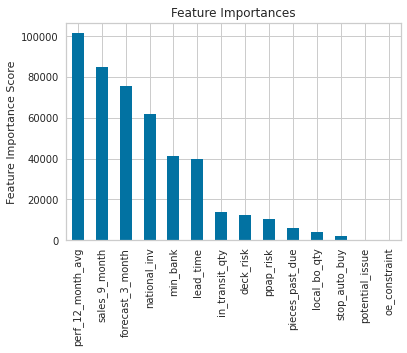

In [42]:
#https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/
params = {
 'learning_rate':[0.3],  #ideal: 0.01-0.2  
 'max_depth':[20],
 'min_child_weight':[2], # got 5 from GridSearch
 #'subsample':[i/10.0 for i in range(4,10,2)],
 'n_estimators':[1000],
 'colsample_bytree':[1],
 'scale_pos_weight':[0.5, 1, 1.5, 2, 3]
}

import dask.dataframe as dd
x_train_res_ddf = dd.from_pandas(x_train_res, npartitions=10)
y_train_res_ddf = dd.from_pandas(y_train_res, npartitions=10)
x_test_ddf = dd.from_pandas(x_test, npartitions=10)
y_test_ddf = dd.from_pandas(y_test, npartitions=10)

cluster = LocalCUDACluster()
client = Client(cluster)
from joblib import parallel_backend

with LocalCUDACluster() as cluster:
    with Client(cluster) as client:
        #grid_xgb, y_pred_train_xgb, y_predprob_train_xgb, y_pred_test_xgb, y_predprob_test_xgb, xgb_hist = modelfit(x_train_res, y_train_res, x_test, y_test, params, client)
        grid_xgb, grid_result_xgb, y_pred_test_xgb, y_predprob_test_xgb = modelfit(x_train_res, y_train_res, x_test, y_test, params, client)
        

In [43]:
pd.DataFrame(grid_xgb.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_scale_pos_weight,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,46.484800,2.354178,55.630636,4.037393,1,0.3,20,2,1000,0.5,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.997505,0.999812,0.999814,0.999044,0.001088,3
1,48.735656,4.243510,56.907515,4.643050,1,0.3,20,2,1000,1,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.997510,0.999817,0.999824,0.999050,0.001089,1
2,50.881942,5.303036,57.380478,4.899698,1,0.3,20,2,1000,1.5,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.997505,0.999820,0.999826,0.999050,0.001093,2
3,51.985348,5.542586,58.673000,5.156594,1,0.3,20,2,1000,2,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.997446,0.999824,0.999825,0.999032,0.001121,4
4,53.299481,6.396936,59.382385,4.787852,1,0.3,20,2,1000,3,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.997426,0.999825,0.999829,0.999027,0.001132,5


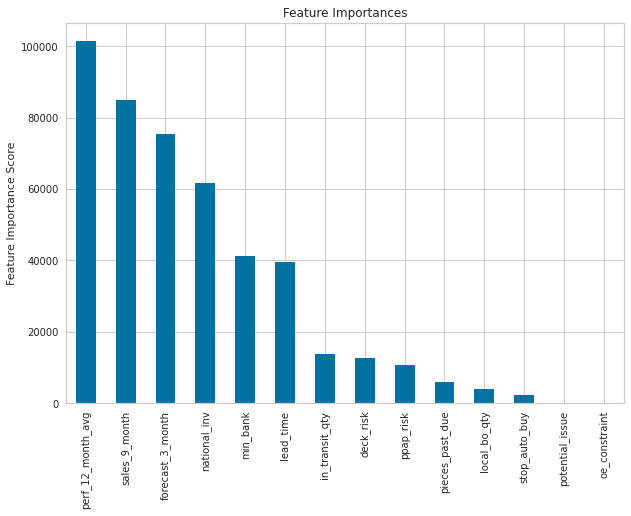

In [44]:
feat_imp = pd.Series(grid_result_xgb.get_booster().get_score()).sort_values(ascending=False)
plt.figure(figsize=(10,7))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')   
plt.savefig("xgb_imp_features.png")

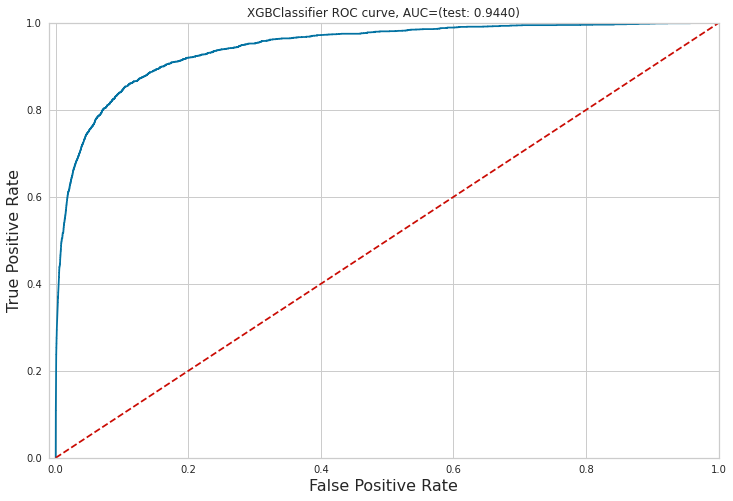

In [45]:
#plt.plot(iterations, train_history["validation_0"]["aucpr"], label="training data")
#plt.plot(iterations, train_history["validation_1"]["aucpr"], label="test data")
fpr_test, tpr_test, _ = sklearn.metrics.roc_curve(y_test, y_predprob_test_xgb)
auc_test = sklearn.metrics.auc(fpr_test, tpr_test)
plt.figure(figsize=(12,8))
plt.title(f"XGBClassifier ROC curve, AUC=(test: {auc_test:.4f})")
plt.plot(fpr_test, tpr_test, label="test data")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.axis([-0.01,1,0,1])
plt.savefig("xgb_roc_auc.png")

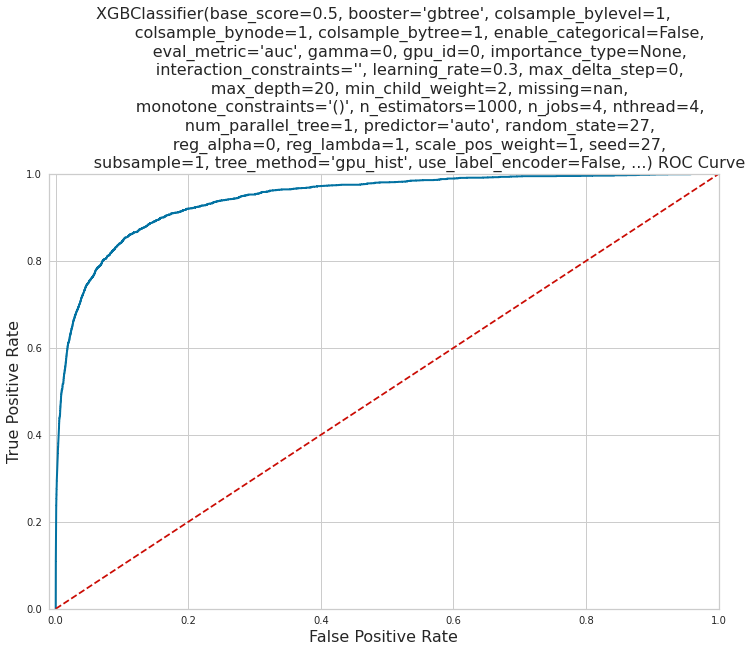

In [46]:
def roc_curve(model, fpr, tpr):
    plt.figure(figsize=(12,8))
    plt.title('{} ROC Curve'.format(model), fontsize=16)
    plt.plot(fpr, tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
roc_curve(grid_result_xgb, fpr_test, tpr_test)
plt.show()

Text(0.5, 1.0, 'OverSampling Precision-Recall curve:\nAverage Precision-Recall Score =0.37')

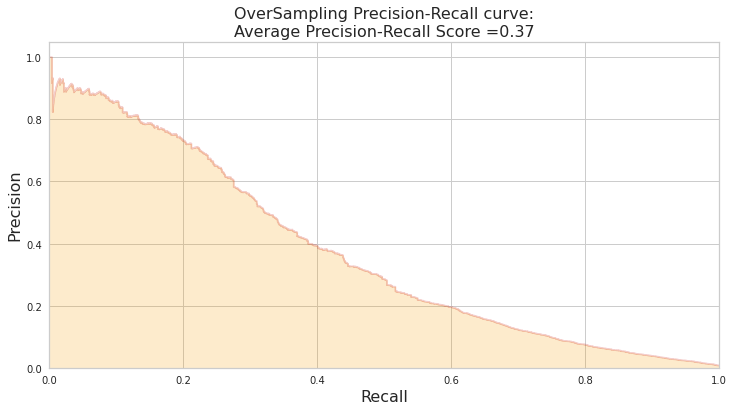

In [47]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test, y_predprob_test_xgb)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve:\nAverage Precision-Recall Score ={0:0.2f}'.format(
          sklearn.metrics.average_precision_score(y_test, y_predprob_test_xgb)), fontsize=16)

In [48]:
print(sklearn.metrics.classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    352533
           1       0.38      0.41      0.39      2531

    accuracy                           0.99    355064
   macro avg       0.69      0.70      0.70    355064
weighted avg       0.99      0.99      0.99    355064



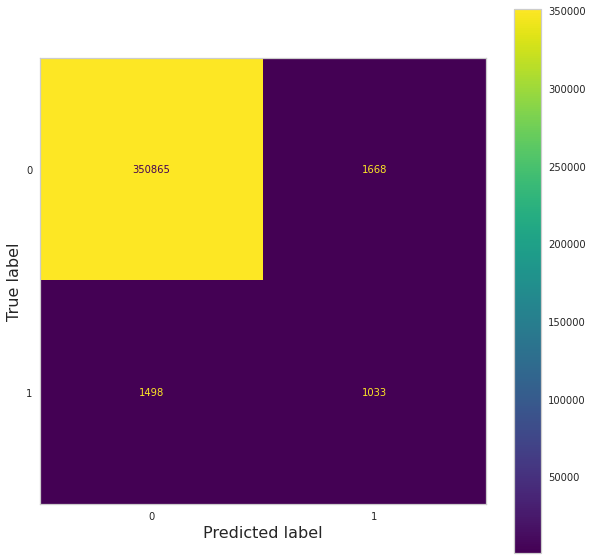

In [49]:
confusionMatrix = confusion_matrix(y_test,y_pred_test_xgb,labels=[0,1])
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix,display_labels=[0,1])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
cm_display.plot(ax=ax)
plt.savefig('xgb_confusion_matrix.png')

In [50]:
grid_xgb.best_params_, grid_xgb.best_score_

({'colsample_bytree': 1,
  'learning_rate': 0.3,
  'max_depth': 20,
  'min_child_weight': 2,
  'n_estimators': 1000,
  'scale_pos_weight': 1},
 0.9990502306084631)

In [51]:
grid_result = grid_xgb
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

0.999044 (0.001088) with: {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 20, 'min_child_weight': 2, 'n_estimators': 1000, 'scale_pos_weight': 0.5}
0.999050 (0.001089) with: {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 20, 'min_child_weight': 2, 'n_estimators': 1000, 'scale_pos_weight': 1}
0.999050 (0.001093) with: {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 20, 'min_child_weight': 2, 'n_estimators': 1000, 'scale_pos_weight': 1.5}
0.999032 (0.001121) with: {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 20, 'min_child_weight': 2, 'n_estimators': 1000, 'scale_pos_weight': 2}
0.999027 (0.001132) with: {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 20, 'min_child_weight': 2, 'n_estimators': 1000, 'scale_pos_weight': 3}
Best: 0.999050 using {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 20, 'min_child_weight': 2, 'n_estimators': 1000, 'scale_pos_weight': 1}


In [52]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred_test_xgb))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.41      1.00      0.64      0.43    352533
          1       0.38      0.41      1.00      0.39      0.64      0.38      2531

avg / total       0.99      0.99      0.41      0.99      0.64      0.43    355064



max_depth = 5 : This should be between 3-10. I’ve started with 5 but you can choose a different number as well. 4-6 can be good starting points.\
min_child_weight = 1 : A smaller value is chosen because it is a highly imbalanced class problem and leaf nodes can have smaller size groups.\
gamma = 0 : A smaller value like 0.1-0.2 can also be chosen for starting. This will anyways be tuned later.\
subsample, colsample_bytree = 0.8 : This is a commonly used used start value. Typical values range between 0.5-0.9.\
scale_pos_weight = 1: Because of high class imbalance.

## Neural Network

In [53]:
# Model and performance
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils import class_weight

In [54]:
# Calculate weights using sklearn
sklearn_weights = class_weight.compute_class_weight('balanced', classes= np.unique(y_train_res), y=y_train_res)
sklearn_weights

array([0.66666667, 2.        ])

In [55]:
# Transform array to dictionary
sklearn_weights = dict(enumerate(sklearn_weights))
sklearn_weights

{0: 0.6666666666666666, 1: 2.0}

In [56]:
# instantiating the model in the strategy scope creates the model on the TPU
#with tpu_strategy.scope():
with LocalCUDACluster() as cluster:
    with Client(cluster) as client:
        # Train the neural network model using the imbalanced dataset
        # Create model
        nn_model_balanced = Sequential()
        nn_model_balanced.add(Dense(10,input_dim=x_train_res.shape[1],activation='relu'))
        nn_model_balanced.add(Dense(1,activation='sigmoid'))
        #Compile model
        nn_model_balanced.compile(loss='binary_crossentropy',optimizer='adam')
        #Fit the model
        #using 2 class weights [{0: 0.6666666666666666, 1: 2.0}, {0: 1, 1: 1.5}]
        nn_model_balanced.fit(x_train_res,y_train_res, epochs=50, batch_size=100, class_weight={0: 1, 1: 1.5})
        # Prediction
        nn_model_balanced_prediction = nn_model_balanced.predict(x_test)
        nn_model_balanced_classes = [1 if i>0.5 else 0 for i in nn_model_balanced_prediction]
        # Check the model performance
        print(classification_report(y_test, nn_model_balanced_classes))

distributed.preloading - INFO - Import preload module: dask_cuda.initialize
distributed.worker - WARNING - Mismatched versions found

+-------------+-------------+-----------+-----------+
| Package     | This Worker | scheduler | workers   |
+-------------+-------------+-----------+-----------+
| dask        | 2022.01.0   | 2022.02.0 | 2022.01.0 |
| distributed | 2022.01.0   | 2022.02.0 | 2022.01.0 |
+-------------+-------------+-----------+-----------+
distributed.preloading - INFO - Import preload module: dask_cuda.initialize
distributed.worker - WARNING - Mismatched versions found

+-------------+-------------+-----------+-----------+
| Package     | This Worker | scheduler | workers   |
+-------------+-------------+-----------+-----------+
| dask        | 2022.01.0   | 2022.02.0 | 2022.01.0 |
| distributed | 2022.01.0   | 2022.02.0 | 2022.01.0 |
+-------------+-------------+-----------+-----------+


Epoch 1/50
18804/18804 [==============================] - 73s 4ms/step - loss: 0.3407
Epoch 2/50
18804/18804 [==============================] - 69s 4ms/step - loss: 0.3279
Epoch 3/50
18804/18804 [==============================] - 70s 4ms/step - loss: 0.3259
Epoch 4/50
18804/18804 [==============================] - 69s 4ms/step - loss: 0.3247
Epoch 5/50
18804/18804 [==============================] - 69s 4ms/step - loss: 0.3236
Epoch 6/50
18804/18804 [==============================] - 70s 4ms/step - loss: 0.3223
Epoch 7/50
18804/18804 [==============================] - 69s 4ms/step - loss: 0.3213
Epoch 8/50
18804/18804 [==============================] - 69s 4ms/step - loss: 0.3204
Epoch 9/50
18804/18804 [==============================] - 69s 4ms/step - loss: 0.3197
Epoch 10/50
18804/18804 [==============================] - 70s 4ms/step - loss: 0.3190
Epoch 11/50
18804/18804 [==============================] - 70s 4ms/step - loss: 0.3187
Epoch 12/50
18804/18804 [===========================

distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)


18804/18804 [==============================] - 72s 4ms/step - loss: 0.3166
Epoch 37/50
18804/18804 [==============================] - 70s 4ms/step - loss: 0.3166
Epoch 38/50
18804/18804 [==============================] - 70s 4ms/step - loss: 0.3166
Epoch 39/50
18804/18804 [==============================] - 70s 4ms/step - loss: 0.3165
Epoch 40/50
18804/18804 [==============================] - 71s 4ms/step - loss: 0.3165
Epoch 41/50
18804/18804 [==============================] - 70s 4ms/step - loss: 0.3165
Epoch 42/50
18804/18804 [==============================] - 71s 4ms/step - loss: 0.3165
Epoch 43/50
18804/18804 [==============================] - 70s 4ms/step - loss: 0.3164
Epoch 44/50
18804/18804 [==============================] - 72s 4ms/step - loss: 0.3165
Epoch 45/50
18804/18804 [==============================] - 71s 4ms/step - loss: 0.3165
Epoch 46/50
18804/18804 [==============================] - 71s 4ms/step - loss: 0.3165
Epoch 47/50
18804/18804 [==============================

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, nn_model_balanced_classes)

array([[324704,  27829],
       [   571,   1960]])

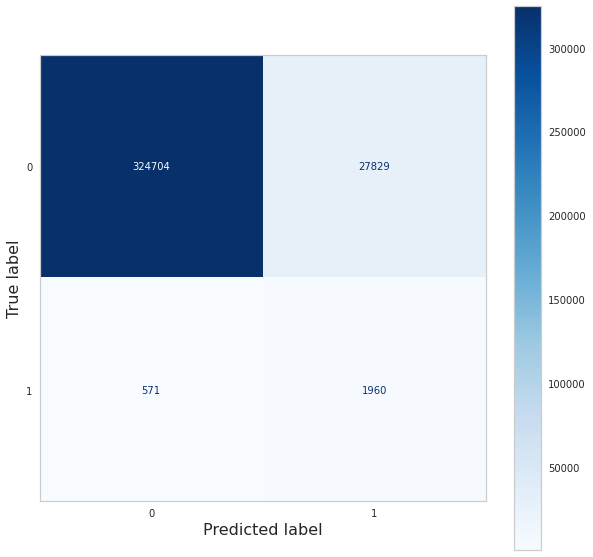

In [58]:
confusionMatrix = confusion_matrix(y_test,nn_model_balanced_classes,labels=[0,1])
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix,display_labels=[0,1])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
cm_display.plot(ax=ax,cmap="Blues", values_format='')
plt.savefig('nn2_confusion_matrix.png')

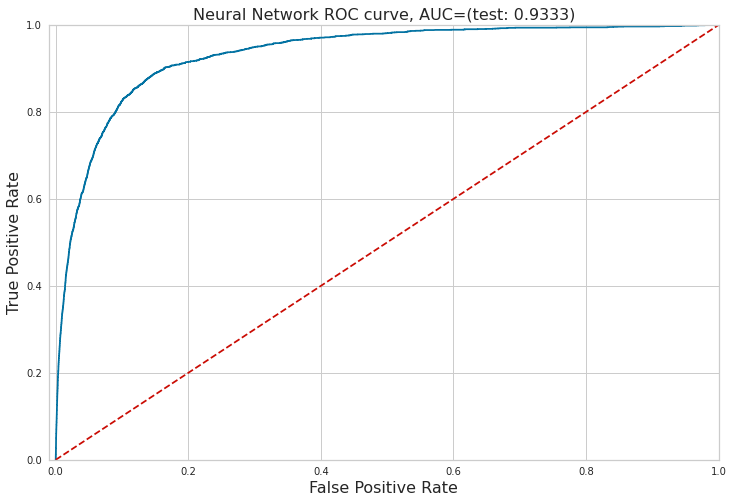

In [59]:
fpr_test, tpr_test, _ = sklearn.metrics.roc_curve(y_test, nn_model_balanced_prediction)
auc_test = sklearn.metrics.auc(fpr_test, tpr_test)
plt.figure(figsize=(12,8))
plt.title(f"Neural Network ROC curve, AUC=(test: {auc_test:.4f})", fontsize=16)
plt.plot(fpr_test, tpr_test, label="test data")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.axis([-0.01,1,0,1])
plt.savefig("nn2_roc_auc.png")

In [60]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, nn_model_balanced_classes))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.92      0.77      0.96      0.84      0.72    352533
          1       0.07      0.77      0.92      0.12      0.84      0.70      2531

avg / total       0.99      0.92      0.78      0.95      0.84      0.72    355064



Text(0.5, 1.0, 'OverSampling Precision-Recall curve:\nAverage Precision-Recall Score =0.16')

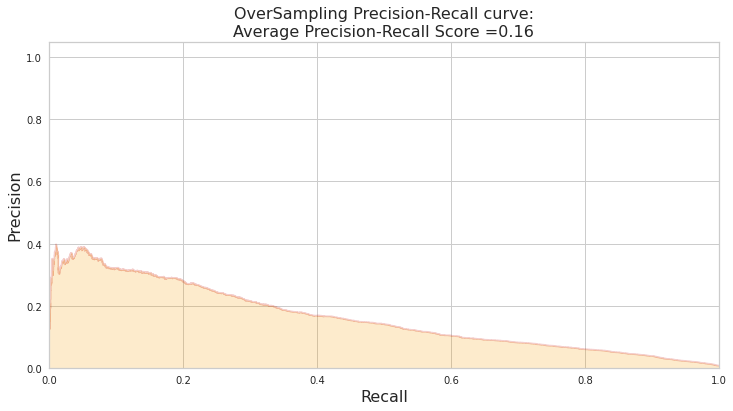

In [61]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test, nn_model_balanced_prediction)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve:\nAverage Precision-Recall Score ={0:0.2f}'.format(
          sklearn.metrics.average_precision_score(y_test, nn_model_balanced_prediction)), fontsize=16)

# Logistic Regression

In [62]:
x_train_res=pd.read_csv('../input/smotencscmodelling/x_train_res.csv')
y_train_res=pd.read_csv('../input/smotencscmodelling/y_train_res.csv')
x_test=pd.read_csv('../input/smotencscmodelling/x_test.csv')
y_test=pd.read_csv('../input/smotencscmodelling/y_test.csv')
# dropping the Unnamed: 0 column
x_train_res = x_train_res.drop(['Unnamed: 0'],axis=1)
y_train_res = y_train_res.drop(['Unnamed: 0'],axis=1)['went_on_backorder']
x_test = x_test.drop(['Unnamed: 0'],axis=1)
y_test = y_test.drop(['Unnamed: 0'],axis=1)['went_on_backorder']

In [63]:
def modelfit(x_train, y_train, x_test, y_test, params, client, early_stopping_rounds=100):    
    alg = LogisticRegression(solver='liblinear',multi_class='auto')
    #cv = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True)
    grid_log = sklearn.model_selection.GridSearchCV(estimator = alg, param_grid = params, cv=3, verbose=2, scoring='roc_auc')
    
    #Fit the algorithm on the data
    #grid_xgb.fit(x_train, y_train, eval_set=eval_s, early_stopping_rounds=100)
    grid_log.fit(x_train, y_train)
    grid_log = grid_log
    grid_result_log = grid_log.best_estimator_
    
    #train_history = grid_result.evals_result()
    y_pred_test_log = grid_result_log.predict(x_test)
    y_predprob_test_log = grid_result_log.predict_proba(x_test)[:,1]
   
    #return grid_result, y_pred_train, y_predprob_train, y_pred_test, y_predprob_test, train_history
    return grid_log, grid_result_log, y_pred_test_log, y_predprob_test_log
    

In [64]:
#https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/
params = {
 'C': [1,5,10,100],  
 'class_weight':[{0:1.0, 1:3.0}, {0:1.0, 1:1.5},{0:1.0, 1:2.0},{0:1.0, 1:1.0}, 'balanced']
}

cluster = LocalCUDACluster()
client = Client(cluster)

with LocalCUDACluster() as cluster:
    with Client(cluster) as client:
        #grid_xgb, y_pred_train_xgb, y_predprob_train_xgb, y_pred_test_xgb, y_predprob_test_xgb, xgb_hist = modelfit(x_train_res, y_train_res, x_test, y_test, params, client)
        grid_log, grid_result_log, y_pred_test_log, y_predprob_test_log = modelfit(x_train_res, y_train_res, x_test, y_test, params, client)
        

distributed.preloading - INFO - Import preload module: dask_cuda.initialize
distributed.worker - WARNING - Mismatched versions found

+-------------+-------------+-----------+-----------+
| Package     | This Worker | scheduler | workers   |
+-------------+-------------+-----------+-----------+
| dask        | 2022.01.0   | 2022.02.0 | 2022.01.0 |
| distributed | 2022.01.0   | 2022.02.0 | 2022.01.0 |
+-------------+-------------+-----------+-----------+
distributed.preloading - INFO - Import preload module: dask_cuda.initialize
distributed.worker - WARNING - Mismatched versions found

+-------------+-------------+-----------+-----------+
| Package     | This Worker | scheduler | workers   |
+-------------+-------------+-----------+-----------+
| dask        | 2022.01.0   | 2022.02.0 | 2022.01.0 |
| distributed | 2022.01.0   | 2022.02.0 | 2022.01.0 |
+-------------+-------------+-----------+-----------+
distributed.preloading - INFO - Import preload module: dask_cuda.initialize
distribu

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END .................C=1, class_weight={0: 1.0, 1: 3.0}; total time=  14.3s
[CV] END .................C=1, class_weight={0: 1.0, 1: 3.0}; total time=  11.9s
[CV] END .................C=1, class_weight={0: 1.0, 1: 3.0}; total time=  12.7s
[CV] END .................C=1, class_weight={0: 1.0, 1: 1.5}; total time=  13.0s
[CV] END .................C=1, class_weight={0: 1.0, 1: 1.5}; total time=  10.9s
[CV] END .................C=1, class_weight={0: 1.0, 1: 1.5}; total time=  13.3s
[CV] END .................C=1, class_weight={0: 1.0, 1: 2.0}; total time=  12.1s
[CV] END .................C=1, class_weight={0: 1.0, 1: 2.0}; total time=  11.5s
[CV] END .................C=1, class_weight={0: 1.0, 1: 2.0}; total time=  13.4s
[CV] END .................C=1, class_weight={0: 1.0, 1: 1.0}; total time=  12.0s
[CV] END .................C=1, class_weight={0: 1.0, 1: 1.0}; total time=  12.5s
[CV] END .................C=1, class_weight={0: 

distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)


[CV] END .................C=5, class_weight={0: 1.0, 1: 3.0}; total time=  13.1s
[CV] END .................C=5, class_weight={0: 1.0, 1: 1.5}; total time=  13.0s
[CV] END .................C=5, class_weight={0: 1.0, 1: 1.5}; total time=   9.9s
[CV] END .................C=5, class_weight={0: 1.0, 1: 1.5}; total time=  12.5s
[CV] END .................C=5, class_weight={0: 1.0, 1: 2.0}; total time=  13.2s
[CV] END .................C=5, class_weight={0: 1.0, 1: 2.0}; total time=  12.3s
[CV] END .................C=5, class_weight={0: 1.0, 1: 2.0}; total time=  13.6s
[CV] END .................C=5, class_weight={0: 1.0, 1: 1.0}; total time=  13.4s
[CV] END .................C=5, class_weight={0: 1.0, 1: 1.0}; total time=  12.2s
[CV] END .................C=5, class_weight={0: 1.0, 1: 1.0}; total time=  13.2s
[CV] END .........................C=5, class_weight=balanced; total time=  12.2s
[CV] END .........................C=5, class_weight=balanced; total time=  13.0s
[CV] END ...................

In [65]:
pd.DataFrame(grid_log.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,12.617815,0.976461,0.360480,0.043939,1,"{0: 1.0, 1: 3.0}","{'C': 1, 'class_weight': {0: 1.0, 1: 3.0}}",0.932869,0.932733,0.933599,0.933067,0.000380,9
1,12.054944,1.055092,0.331568,0.008055,1,"{0: 1.0, 1: 1.5}","{'C': 1, 'class_weight': {0: 1.0, 1: 1.5}}",0.932897,0.932735,0.933620,0.933084,0.000385,4
2,11.988957,0.792839,0.334702,0.011630,1,"{0: 1.0, 1: 2.0}","{'C': 1, 'class_weight': {0: 1.0, 1: 2.0}}",0.932904,0.932757,0.933631,0.933097,0.000382,1
3,12.177351,0.529573,0.420546,0.112354,1,"{0: 1.0, 1: 1.0}","{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}}",0.932851,0.932655,0.933555,0.933020,0.000386,17
4,11.567755,0.187327,0.325702,0.004255,1,balanced,"{'C': 1, 'class_weight': 'balanced'}",0.932882,0.932734,0.933599,0.933072,0.000378,8
5,12.674786,0.793017,0.342469,0.020912,5,"{0: 1.0, 1: 3.0}","{'C': 5, 'class_weight': {0: 1.0, 1: 3.0}}",0.932837,0.932736,0.933600,0.933058,0.000386,12
6,11.487087,1.379070,0.320718,0.003888,5,"{0: 1.0, 1: 1.5}","{'C': 5, 'class_weight': {0: 1.0, 1: 1.5}}",0.932861,0.932737,0.933622,0.933073,0.000391,5
7,12.700965,0.518875,0.349353,0.017515,5,"{0: 1.0, 1: 2.0}","{'C': 5, 'class_weight': {0: 1.0, 1: 2.0}}",0.932869,0.932758,0.933633,0.933087,0.000389,2
8,12.605854,0.512129,0.337598,0.000570,5,"{0: 1.0, 1: 1.0}","{'C': 5, 'class_weight': {0: 1.0, 1: 1.0}}",0.932796,0.932658,0.933557,0.933004,0.000395,18
9,12.256134,0.324381,0.331991,0.003419,5,balanced,"{'C': 5, 'class_weight': 'balanced'}",0.932841,0.932736,0.933600,0.933059,0.000385,10


In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test_log)

array([[313437,  39096],
       [   457,   2074]])

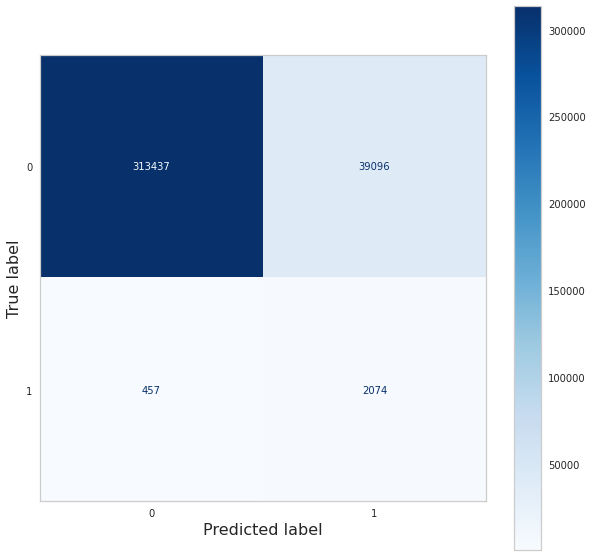

In [67]:
confusionMatrix = confusion_matrix(y_test,y_pred_test_log,labels=[0,1])
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix,display_labels=[0,1])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
cm_display.plot(ax=ax,cmap="Blues", values_format='')
plt.savefig('log_confusion_matrix.png')

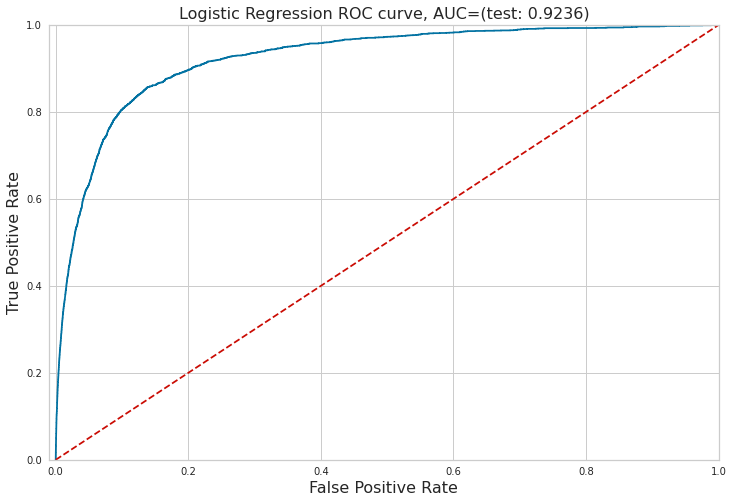

In [68]:
fpr_test, tpr_test, _ = sklearn.metrics.roc_curve(y_test, y_predprob_test_log)
auc_test = sklearn.metrics.auc(fpr_test, tpr_test)
plt.figure(figsize=(12,8))
plt.title(f"Logistic Regression ROC curve, AUC=(test: {auc_test:.4f})", fontsize=16)
plt.plot(fpr_test, tpr_test, label="test data")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.axis([-0.01,1,0,1])
plt.savefig("log_roc_auc.png")

In [69]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred_test_log))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.89      0.82      0.94      0.85      0.73    352533
          1       0.05      0.82      0.89      0.09      0.85      0.72      2531

avg / total       0.99      0.89      0.82      0.93      0.85      0.73    355064



Text(0.5, 1.0, 'OverSampling Precision-Recall curve:\nAverage Precision-Recall Score =0.15')

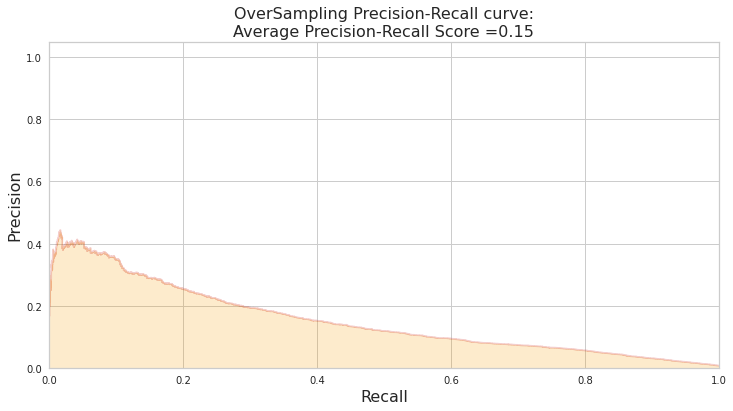

In [70]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test, y_predprob_test_log)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve:\nAverage Precision-Recall Score ={0:0.2f}'.format(
          sklearn.metrics.average_precision_score(y_test, y_predprob_test_log)), fontsize=16)